In [11]:
import pandas as pd
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt


In [12]:
base_dir = r'C:\Users\venka\OneDrive\Desktop\Project\Dataset\Dataset_Signature_Final\Dataset'

gen_sign = [
    glob.glob(base_dir + '\\dataset1\\real\\*.*'),
    glob.glob(base_dir + '\\dataset2\\real\\*.*'),
    glob.glob(base_dir + '\\dataset3\\real\\*.*'),
    glob.glob(base_dir + '\\dataset4\\real\\*.*')
]

# Gather paths for forged signatures
forg_sign = [
    glob.glob(base_dir + '\\dataset1\\forge\\*.*'),
    glob.glob(base_dir + '\\dataset2\\forge\\*.*'),
    glob.glob(base_dir + '\\dataset3\\forge\\*.*'),
    glob.glob(base_dir + '\\dataset4\\forge\\*.*')
]

In [13]:
 gen_sign

[['C:\\Users\\venka\\OneDrive\\Desktop\\Project\\Dataset\\Dataset_Signature_Final\\Dataset\\dataset1\\real\\00100001.png',
  'C:\\Users\\venka\\OneDrive\\Desktop\\Project\\Dataset\\Dataset_Signature_Final\\Dataset\\dataset1\\real\\00101001.png',
  'C:\\Users\\venka\\OneDrive\\Desktop\\Project\\Dataset\\Dataset_Signature_Final\\Dataset\\dataset1\\real\\00102001.png',
  'C:\\Users\\venka\\OneDrive\\Desktop\\Project\\Dataset\\Dataset_Signature_Final\\Dataset\\dataset1\\real\\00103001.png',
  'C:\\Users\\venka\\OneDrive\\Desktop\\Project\\Dataset\\Dataset_Signature_Final\\Dataset\\dataset1\\real\\00104001.png',
  'C:\\Users\\venka\\OneDrive\\Desktop\\Project\\Dataset\\Dataset_Signature_Final\\Dataset\\dataset1\\real\\00200002.png',
  'C:\\Users\\venka\\OneDrive\\Desktop\\Project\\Dataset\\Dataset_Signature_Final\\Dataset\\dataset1\\real\\00201002.png',
  'C:\\Users\\venka\\OneDrive\\Desktop\\Project\\Dataset\\Dataset_Signature_Final\\Dataset\\dataset1\\real\\00202002.png',
  'C:\\Users\\ve

In [14]:
forg_sign

[['C:\\Users\\venka\\OneDrive\\Desktop\\Project\\Dataset\\Dataset_Signature_Final\\Dataset\\dataset1\\forge\\02100001.png',
  'C:\\Users\\venka\\OneDrive\\Desktop\\Project\\Dataset\\Dataset_Signature_Final\\Dataset\\dataset1\\forge\\02100002.png',
  'C:\\Users\\venka\\OneDrive\\Desktop\\Project\\Dataset\\Dataset_Signature_Final\\Dataset\\dataset1\\forge\\02100003.png',
  'C:\\Users\\venka\\OneDrive\\Desktop\\Project\\Dataset\\Dataset_Signature_Final\\Dataset\\dataset1\\forge\\02100004.png',
  'C:\\Users\\venka\\OneDrive\\Desktop\\Project\\Dataset\\Dataset_Signature_Final\\Dataset\\dataset1\\forge\\02100005.png',
  'C:\\Users\\venka\\OneDrive\\Desktop\\Project\\Dataset\\Dataset_Signature_Final\\Dataset\\dataset1\\forge\\02100006.png',
  'C:\\Users\\venka\\OneDrive\\Desktop\\Project\\Dataset\\Dataset_Signature_Final\\Dataset\\dataset1\\forge\\02100007.png',
  'C:\\Users\\venka\\OneDrive\\Desktop\\Project\\Dataset\\Dataset_Signature_Final\\Dataset\\dataset1\\forge\\02100008.png',
  'C:\\U

In [15]:
def load_images(file_list):
    images = []
    for files in file_list:
        for file in files:
            img = cv2.imread(file)
            if img is None:
                print(f"Failed to load image: {file}")
            images.append(img)
    return images

In [16]:
gen_imgs = load_images(gen_sign)
forg_imgs = load_images(forg_sign)

In [17]:
print(gen_imgs[0])

[[[252 252 244]
  [252 252 244]
  [252 252 244]
  ...
  [253 251 239]
  [253 251 241]
  [253 252 242]]

 [[252 252 244]
  [252 252 244]
  [252 252 244]
  ...
  [253 252 241]
  [253 251 240]
  [253 252 242]]

 [[252 252 243]
  [252 252 243]
  [252 252 244]
  ...
  [253 251 240]
  [253 251 239]
  [253 251 240]]

 ...

 [[252 252 243]
  [253 252 242]
  [253 252 241]
  ...
  [253 252 242]
  [253 252 242]
  [253 252 242]]

 [[252 252 243]
  [252 252 243]
  [253 252 242]
  ...
  [253 252 241]
  [252 252 242]
  [252 252 243]]

 [[253 252 242]
  [252 252 242]
  [253 252 243]
  ...
  [253 251 240]
  [253 251 239]
  [253 252 241]]]


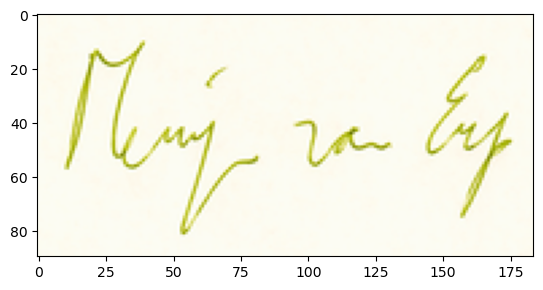

In [18]:
plt.imshow(gen_imgs[1])
plt.show()


In [19]:
print(gen_imgs[0].shape)

(88, 191, 3)


In [47]:
cv2.imshow('Genuine Signature',gen_imgs[0])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
num_gen = sum([len(x) for x in gen_sign])
num_forg = sum([len(x) for x in forg_sign])

print(f'Number of real signatures: {num_gen}')
print(f'Number of forged signatures: {num_forg}')

Number of real signatures: 360
Number of forged signatures: 360


In [21]:
gen_shape = [x.shape for x in gen_imgs]
forg_shape = [x.shape for x in forg_imgs]
print('Shape of real images:',gen_shape[:5])
print('Shape of forged images:',forg_shape[:5])

gen_color = [x.shape[2] for x in gen_imgs]
forg_color = [x.shape[2] for x in forg_imgs]
print('Color channels of real images:',gen_color[:5])
print('Color channels of forged images:',forg_color[:5])

gen_pixels = [x.mean() for x in gen_imgs]
forg_pixels = [x.mean() for x in forg_imgs]
print('Mean pixels values of real images:',gen_pixels[:5])
print('Mean pixels values of forged images:',forg_pixels[:5])


Shape of real images: [(88, 191, 3), (90, 184, 3), (80, 202, 3), (90, 186, 3), (90, 194, 3)]
Shape of forged images: [(83, 226, 3), (118, 223, 3), (91, 272, 3), (76, 161, 3), (83, 166, 3)]
Color channels of real images: [3, 3, 3, 3, 3]
Color channels of forged images: [3, 3, 3, 3, 3]
Mean pixels values of real images: [242.76453672854197, 243.156038647343, 243.3089315181518, 243.03986459577857, 242.72010309278352]
Mean pixels values of forged images: [242.45354870810675, 243.70669605533178, 243.68103587588882, 239.77849515092078, 243.47038757439395]


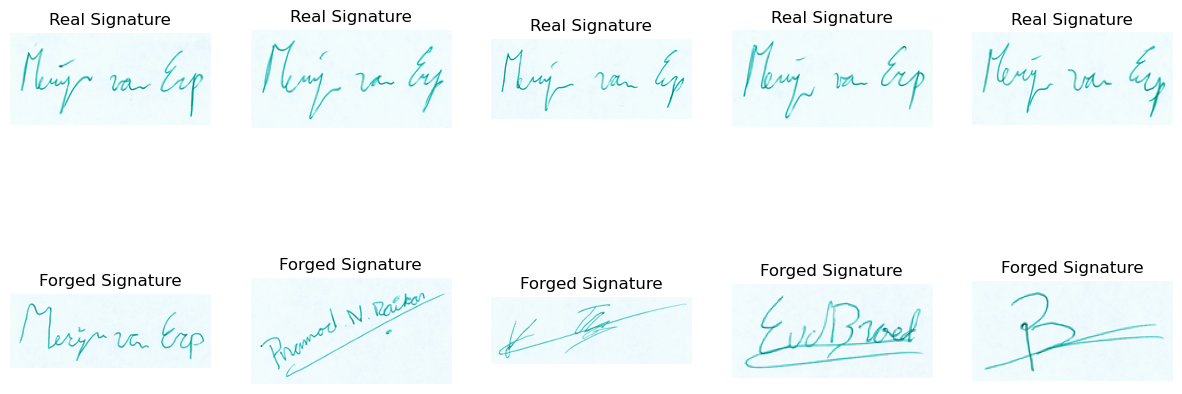

In [24]:
fig, ax = plt.subplots(2, 5, figsize=(15, 6))

for i in range(5):
    # Display the real signatures after converting from BGR to RGB
    ax[0, i].imshow(cv2.cvtColor(gen_imgs[i], cv2.COLOR_BGR2RGB))
    ax[0, i].set_title('Real Signature')
    ax[0, i].axis('off')

    # Display the forged signatures after converting from BGR to RGB
    ax[1, i].imshow(cv2.cvtColor(forg_imgs[i], cv2.COLOR_BGR2RGB))
    ax[1, i].set_title('Forged Signature')
    ax[1, i].axis('off')

plt.show()


In [25]:
image_data = pd.DataFrame(columns=['Type','Shape','Color Channels','Mean Pixel Value'])

In [26]:
data_list = []
for i in range(len(gen_shape)):
    data_list.append({'Type': 'Real',
                      'Shape': gen_shape[i],
                      'Color Channels': gen_color[i],
                      'Mean Pixel Value': gen_pixels[i]})
for i in range(len(forg_shape)):
    data_list.append({'Type': 'Forged',
                      'Shape': forg_shape[i],
                      'Color Channels': forg_color[i],
                      'Mean Pixel Value': forg_pixels[i]})
image_data = pd.concat([image_data,pd.DataFrame(data_list)],ignore_index=True)
                                                                                                                                                                                                                                 

C:\Users\venka\AppData\Local\Temp\ipykernel_18844\950310978.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  image_data = pd.concat([image_data,pd.DataFrame(data_list)],ignore_index=True)


In [28]:
image_data.head()

,Type,Shape,Color Channels,Mean Pixel Value
0,Real,"(88, 191, 3)",3,242.764537
1,Real,"(90, 184, 3)",3,243.156039
2,Real,"(80, 202, 3)",3,243.308932
3,Real,"(90, 186, 3)",3,243.039865
4,Real,"(90, 194, 3)",3,242.720103


In [29]:
image_data.tail()


,Type,Shape,Color Channels,Mean Pixel Value
715,Forged,"(382, 1010, 3)",3,240.179306
716,Forged,"(532, 1552, 3)",3,243.524036
717,Forged,"(386, 1023, 3)",3,240.151832
718,Forged,"(571, 1402, 3)",3,243.676428
719,Forged,"(336, 965, 3)",3,238.301999


In [30]:
image_data.shape

(720, 4)

In [31]:
print(image_data.describe())

       Mean Pixel Value
count        720.000000
mean         243.039370
std            5.213333
min          226.423019
25%          239.804540
50%          242.563931
75%          247.552634
max          252.423212


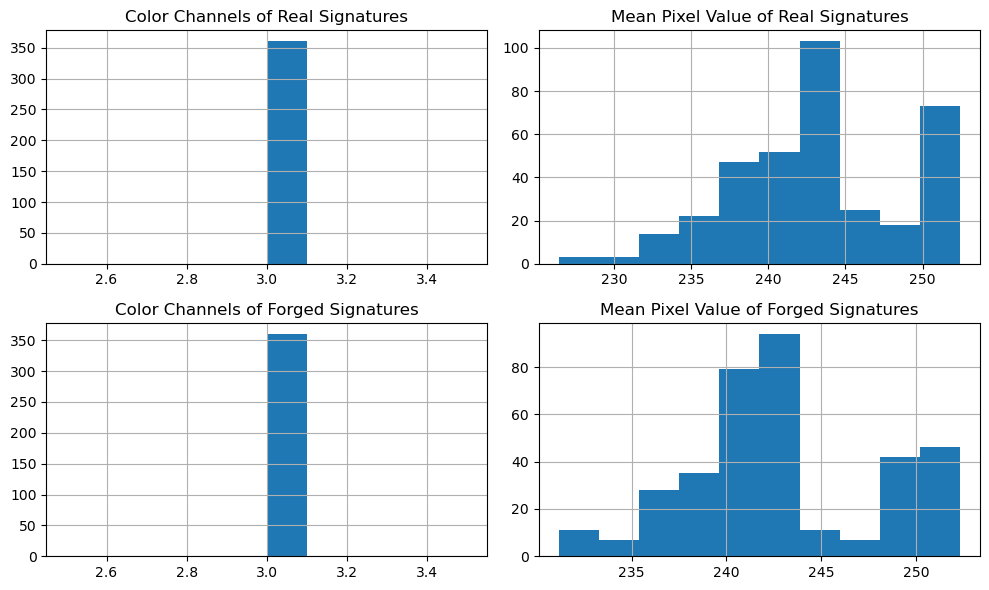

In [32]:
fig,ax = plt.subplots(2,2,figsize=(10,6))
image_data[image_data['Type']=='Real']['Color Channels'].hist(ax=ax[0,0])
image_data[image_data['Type']=='Forged']['Color Channels'].hist(ax=ax[1,0])
image_data[image_data['Type']=='Real']['Mean Pixel Value'].hist(ax=ax[0,1])
image_data[image_data['Type']=='Forged']['Mean Pixel Value'].hist(ax=ax[1,1])

ax[0,0].set_title('Color Channels of Real Signatures')
ax[0,1].set_title('Mean Pixel Value of Real Signatures')
ax[1,0].set_title('Color Channels of Forged Signatures')
ax[1,1].set_title('Mean Pixel Value of Forged Signatures')

plt.tight_layout()
plt.show()


In [33]:
#RECURRENT NEURAL NETWORKS(RNN)
import tensorflow
from tensorflow import keras
from keras import layers

In [34]:
(train_data,train_labels),(test_data,test_labels) = keras.datasets.mnist.load_data()

In [35]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [44]:
train_data = train_data.reshape((train_data.shape[0],train_data.shape[1],train_data.shape[2]*1))
test_data = test_data.reshape((test_data.shape[0],test_data.shape[1],test_data.shape[2]*1))
train_data = train_data.astype('float32')/255
test_data = test_data.astype('float32')/255


In [45]:
#define the model
model = keras.Sequential([layers.LSTM(32,input_shape=(train_data.shape[1],train_data.shape[2])),
                        layers.Dense(10,activation='softmax')])

In [38]:
#compile model
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [39]:
#save model
model.save('rnn_signature_verification_model.hS')

INFO:tensorflow:Assets written to: rnn_signature_verification_model.hS\assets


INFO:tensorflow:Assets written to: rnn_signature_verification_model.hS\assets


In [40]:
#summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                7808      
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
Total params: 8,138
Trainable params: 8,138
Non-trainable params: 0
_________________________________________________________________


In [41]:
#create early stop
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

In [42]:
#train the model
history = model.fit(train_data,train_labels,batch_size=32,epochs=10,validation_split=0.2,callbacks=[early_stop])


Epoch 1/10
1500/1500 [==============================] - 38s 22ms/step - loss: 0.7621 - accuracy: 0.1062 - val_loss: 0.3142 - val_accuracy: 0.0987
Epoch 2/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2569 - accuracy: 0.0982 - val_loss: 0.1846 - val_accuracy: 0.1000
Epoch 3/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1711 - accuracy: 0.0981 - val_loss: 0.1448 - val_accuracy: 0.1026
Epoch 4/10
1500/1500 [==============================] - 17s 12ms/step - loss: 0.1376 - accuracy: 0.0987 - val_loss: 0.1246 - val_accuracy: 0.1000
Epoch 5/10
1500/1500 [==============================] - 19s 12ms/step - loss: 0.1147 - accuracy: 0.0985 - val_loss: 0.1040 - val_accuracy: 0.0993
Epoch 6/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1006 - accuracy: 0.0984 - val_loss: 0.1104 - val_accuracy: 0.1004
Epoch 7/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0886 - accuracy: 0.0985 - val_loss: 0.0960 -

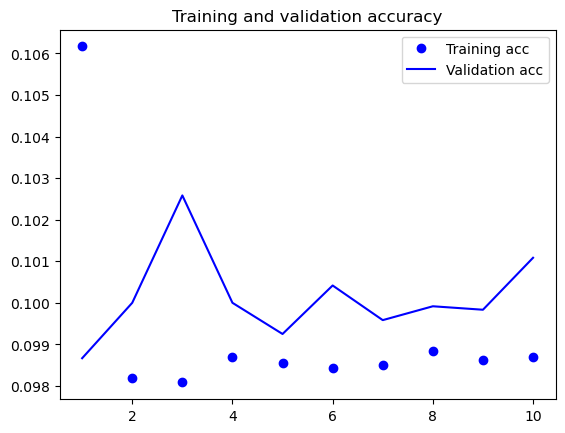

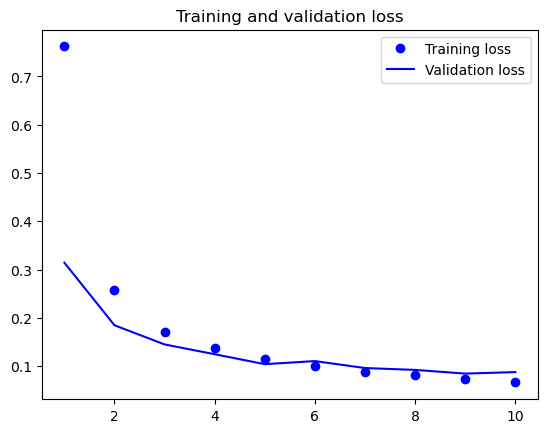

In [43]:
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1,len(acc)+1)
 
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs, val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()